In [1]:
import pysam

In [15]:
samfile = pysam.AlignmentFile("/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/to_t2t_v1_1/sort_aligned_T2Tv1_1_trim_bam_pass_merged.bam",
                               "rb")


In [16]:
t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
t2t_v1_1_cd55_30bps

'chr1:206586162-206586192'

In [ ]:
for read in samfile.fetch('chr1', 206586162, 206586192):
    print(read)

samfile.close()

ValueError: I/O operation on closed file

In [ ]:
# import pysam
# import pandas as pd

# def extract_sequences(bam_file, region):
#     """
#     Extracts sequences from a BAM file for a specific genomic region and isolates 
#     the subsequence that overlaps exactly with the region.

#     Args:
#         bam_file (str): Path to the BAM file.
#         region (str): Genomic region in the format 'chr:start-end'.

#     Returns:
#         pd.DataFrame: DataFrame containing the extracted sequences and their overlap with the region.
#     """
#     # Parse the region
#     chrom, positions = region.split(':')
#     start, end = map(int, positions.split('-'))

#     # Open the BAM file
#     bam = pysam.AlignmentFile(bam_file, "rb")

#     # List to store sequence data
#     data = []

#     # Iterate through reads in the region
#     for read in bam.fetch(chrom, start, end):
#         if not read.is_unmapped:  # Skip unmapped reads
#             # Calculate the overlap
#             read_start = read.reference_start
#             read_end = read.reference_end
            
#             # Find the intersection of the read with the region
#             overlap_start = max(read_start, start)
#             overlap_end = min(read_end, end)

#             # Extract the overlapping sequence
#             if overlap_start < overlap_end:  # Ensure valid overlap
#                 seq_start = overlap_start - read_start
#                 seq_end = seq_start + (overlap_end - overlap_start)
#                 overlapping_sequence = read.query_sequence[seq_start:seq_end]

#                 # Add data to the list
#                 data.append({
#                     'query_name': read.query_name,
#                     'sequence': read.query_sequence,
#                     'quality': read.query_qualities,
#                     'start': read.reference_start,
#                     'end': read.reference_end,
#                     'flag': read.flag,
#                     'overlap_sequence': overlapping_sequence
#                 })

#     # Close the BAM file
#     bam.close()

#     # Create a DataFrame
#     df = pd.DataFrame(data)
#     return df

# # Example usage
# bam_file_path = "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/to_t2t_v1_1/sort_aligned_T2Tv1_1_trim_bam_pass_merged.bam"
# # "example.bam"  # Replace with the path to your BAM file
# region = "chr1:206586162-206586192"

# df = extract_sequences(bam_file_path, region)
# print(df)

                               query_name  \
0    ff1fc249-aa9b-4495-be8d-bed3d2ffa67a   
1    c7283b36-b903-4d07-985d-971a964fce62   
2    3bef509c-fd78-4342-b51f-c2c2dedd7498   
3    65fe0683-cc55-48ab-9b16-fcf33da52389   
4    6ea61913-551f-44b3-b9f5-3fcb7c8744ee   
..                                    ...   
263  724d2b69-fd9f-47e9-92c8-a2c207e2e645   
264  913dafe7-56f2-45a6-b4f2-2278895a4da1   
265  c5f44506-ef09-4f52-8ec7-b8e02c0f15ce   
266  17a256aa-f620-4186-970c-c5f505ff34d4   
267  d0804736-5d96-4264-a9a5-f052c7d0c61e   

                                              sequence  \
0    CTTCGTTCAGTTACGTATTGCTTCCCTGGAATCAGCAGGACTGACC...   
1    TCCTGGAATCACTATTATCAGACGACCTGACCTTTGTTAGTATCTC...   
2    TCACTGGGCCTTTAGCCTTCCCGCTCAATTACCACACTCCCTTCTT...   
3    ATGCTTCGTTCAGTTACGTGGCTTCCTCACTGGGCCTTTTGCCTTC...   
4    CTTCGTTCAGTTACGTATTGCTCACTGGGCCTTTAGCCTTCCCGCT...   
..                                                 ...   
263  ACAGAAGGGAGTGGTGGTTAAGGTTACTGGAGGTTATTGGGGAATA..

In [17]:
import pysam
import pandas as pd

def extract_sequences(bam_file, region):
    """
    Extracts sequences from a BAM file for a specific genomic region and isolates 
    the subsequence that overlaps exactly with the region.

    Args:
        bam_file (str): Path to the BAM file.
        region (str): Genomic region in the format 'chr:start-end'.

    Returns:
        pd.DataFrame: DataFrame containing the extracted sequences and their overlap with the region.
    """
    # Parse the region
    chrom, positions = region.split(':')
    start, end = map(int, positions.split('-'))

    # Open the BAM file
    bam = pysam.AlignmentFile(bam_file, "rb")

    # List to store sequence data
    data = []

    # Iterate through reads in the region
    for read in bam.fetch(chrom, start, end):
        if not read.is_unmapped:  # Skip unmapped reads
            # Calculate the overlap
            read_start = read.reference_start
            read_end = read.reference_end
            
            # Find the intersection of the read with the region
            overlap_start = max(read_start, start)
            overlap_end = min(read_end, end)

            # Extract the overlapping sequence
            if overlap_start < overlap_end:  # Ensure valid overlap
                seq_start = overlap_start - read_start
                seq_end = seq_start + (overlap_end - overlap_start)
                overlapping_sequence = read.query_sequence[seq_start:seq_end]

                # Determine the strand
                strand = "-" if read.is_reverse else "+"

                # Add data to the list
                data.append({
                    'query_name': read.query_name,
                    'sequence': read.query_sequence,
                    'quality': read.query_qualities,
                    'start': read.reference_start,
                    'end': read.reference_end,
                    'flag': read.flag,
                    'overlap_sequence': overlapping_sequence,
                    'strand': strand
                })

    # Close the BAM file
    bam.close()

    # Create a DataFrame
    df = pd.DataFrame(data)
    return df

# Example usage
bam_file_path = "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/to_t2t_v1_1/sort_aligned_T2Tv1_1_trim_bam_pass_merged.bam"
region = "chr1:206586162-206586192"

df = extract_sequences(bam_file_path, region)
print(df)

                               query_name  \
0    ff1fc249-aa9b-4495-be8d-bed3d2ffa67a   
1    c7283b36-b903-4d07-985d-971a964fce62   
2    3bef509c-fd78-4342-b51f-c2c2dedd7498   
3    65fe0683-cc55-48ab-9b16-fcf33da52389   
4    6ea61913-551f-44b3-b9f5-3fcb7c8744ee   
..                                    ...   
263  724d2b69-fd9f-47e9-92c8-a2c207e2e645   
264  913dafe7-56f2-45a6-b4f2-2278895a4da1   
265  c5f44506-ef09-4f52-8ec7-b8e02c0f15ce   
266  17a256aa-f620-4186-970c-c5f505ff34d4   
267  d0804736-5d96-4264-a9a5-f052c7d0c61e   

                                              sequence  \
0    CTTCGTTCAGTTACGTATTGCTTCCCTGGAATCAGCAGGACTGACC...   
1    TCCTGGAATCACTATTATCAGACGACCTGACCTTTGTTAGTATCTC...   
2    TCACTGGGCCTTTAGCCTTCCCGCTCAATTACCACACTCCCTTCTT...   
3    ATGCTTCGTTCAGTTACGTGGCTTCCTCACTGGGCCTTTTGCCTTC...   
4    CTTCGTTCAGTTACGTATTGCTCACTGGGCCTTTAGCCTTCCCGCT...   
..                                                 ...   
263  ACAGAAGGGAGTGGTGGTTAAGGTTACTGGAGGTTATTGGGGAATA..

In [6]:
df.columns

Index(['query_name', 'sequence', 'quality', 'start', 'end', 'flag',
       'overlap_sequence'],
      dtype='object')

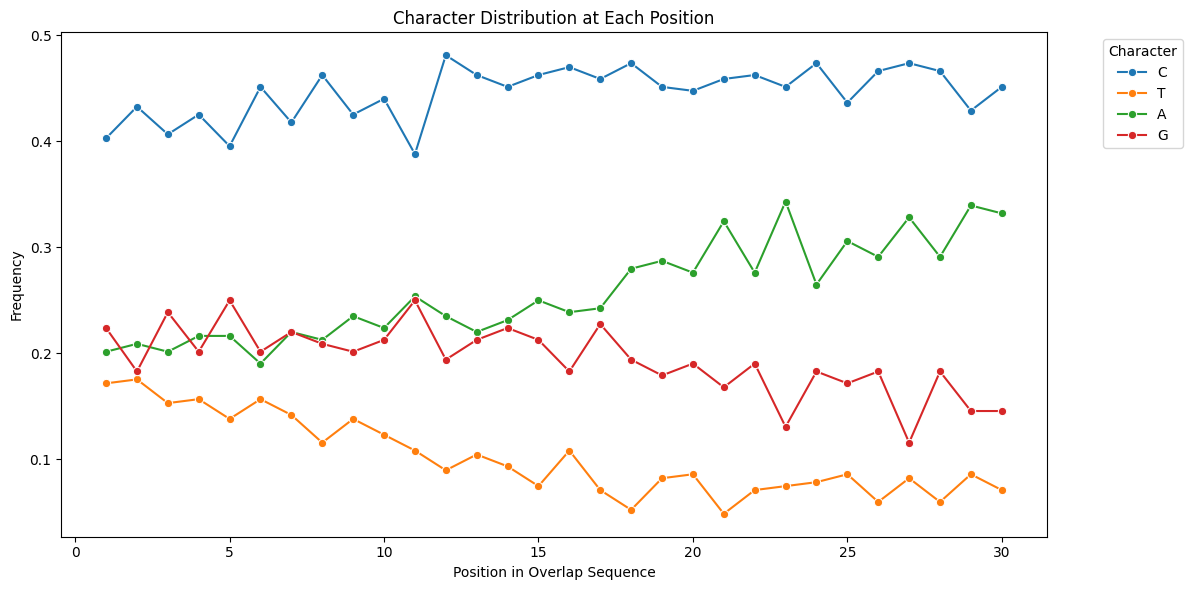

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

def plot_character_distribution(df, region_length):
    """
    Plots the distribution of characters at each position in the overlap_sequence column.

    Args:
        df (pd.DataFrame): DataFrame containing the overlap_sequence column.
        region_length (int): Length of the region being analyzed.
    """
    # Initialize a list to store character counts for each position
    position_counts = [Counter() for _ in range(region_length)]

    # Iterate through each sequence
    for sequence in df['overlap_sequence']:
        for i, char in enumerate(sequence):
            position_counts[i][char] += 1

    # Prepare data for plotting
    position_data = []
    for i, counts in enumerate(position_counts):
        total = sum(counts.values())
        for char, count in counts.items():
            position_data.append({'Position': i + 1, 'Character': char, 'Frequency': count / total})

    # Convert to DataFrame
    position_df = pd.DataFrame(position_data)

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=position_df, x='Position', y='Frequency', hue='Character', marker='o')
    plt.title('Character Distribution at Each Position')
    plt.xlabel('Position in Overlap Sequence')
    plt.ylabel('Frequency')
    plt.legend(title='Character', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Example usage
region_length = 206586192 - 206586162  # Length of the region
plot_character_distribution(df, region_length)

In [8]:
df.overlap_sequence

0      CAGCGTTTTGGGGTCTGTTTGTTTTATTAT
1      TTTATTGTTATCCCACCCCACACCGCCCCG
2      ACCGCCCCGAGGCGCGCGCGCGCGCACACA
3      TTTTATTGTTATCCCACCCCACACCGCCCC
4      CCACCCCACACCGCCCAGAGGCGCGCGCGC
                    ...              
263    TAGAGGCGCGCGCGCGCGCACACACACACA
264    TCCCACCCCTACCACCGCCTTGTGCGCGCG
265    CACCGCCCCGAGGCGCGCGCGCTGACACAC
266    GCGCGCGCGCGCGCACACACACACACACAC
267    ACCGCCCCGCGCGCGCGCGCGCGCACACAC
Name: overlap_sequence, Length: 268, dtype: object

In [9]:
import numpy as np
len(np.unique(df.overlap_sequence))

212

<Figure size 1200x600 with 0 Axes>

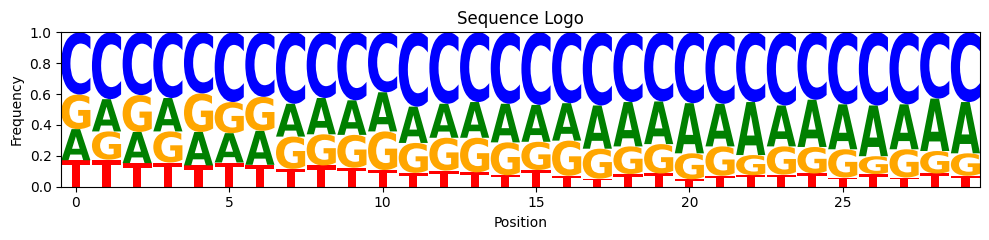

In [10]:
import pandas as pd
import logomaker
from collections import Counter
import matplotlib.pyplot as plt

def create_sequence_logo(df, region_length):
    """
    Creates a sequence logo from the overlap_sequence column.

    Args:
        df (pd.DataFrame): DataFrame containing the overlap_sequence column.
        region_length (int): Length of the region being analyzed.
    """
    # Initialize a list to store character frequencies for each position
    position_frequencies = []

    # Iterate over each position
    for i in range(region_length):
        position_counts = Counter()
        for sequence in df['overlap_sequence']:
            if i < len(sequence):
                position_counts[sequence[i]] += 1

        # Normalize frequencies to sum to 1
        total = sum(position_counts.values())
        position_frequencies.append({char: count / total for char, count in position_counts.items()})

    # Create a DataFrame from position frequencies
    frequency_df = pd.DataFrame(position_frequencies).fillna(0)
    frequency_df.index.name = 'Position'

    # Generate the sequence logo
    plt.figure(figsize=(12, 6))
    logo = logomaker.Logo(frequency_df, color_scheme="classic")
    plt.title("Sequence Logo")
    plt.xlabel("Position")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Example usage
region_length = 206586192 - 206586162  # Length of the region
create_sequence_logo(df, region_length)

In [11]:
bam_Jurkat_dorado_bam_path = "/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20240927_cas9_R9_promethion_converted_fast5_called.dna_r9.4.1_e8_sup@v3.6.bam"
# "/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam"

# "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/to_t2t_v1_1/sort_aligned_T2Tv1_1_trim_bam_pass_merged.bam"
# "example.bam"  # Replace with the path to your BAM file
region = "chr1:206586162-206586192"

df_Jurkat = extract_sequences(bam_Jurkat_dorado_bam_path, region)
print(df_Jurkat)

np.unique(df_Jurkat.overlap_sequence, return_counts=True )

                               query_name  \
0    af025a94-ab95-4f2c-b042-c12d634728d8   
1    b69854bc-ff64-4b07-bf2e-b05edf6385ba   
2    98feb4c6-8f87-47ec-bebf-1734bfff7f1c   
3    c144514b-d17c-4f8f-b850-41a19f3f1cee   
4    4a9708df-dfb6-4e6f-8795-a6f3e697e947   
..                                    ...   
930  1f98a61a-e1db-47d0-be2c-8eaa4f652127   
931  03faf2c3-232a-41bd-8351-51345d42b6fc   
932  cbd05586-1c36-46fd-9fa6-5e73868e7374   
933  ce603029-b675-44e6-a6a9-12b0cac6b940   
934  f98c6f18-8854-481c-b1d8-cb317e679560   

                                              sequence  \
0    TTCTGGATTGATTGCATGTTGCTTCCTGGAATCAACAGGACTGACC...   
1    TTCGTTCAGTTACCGTATTGCTTCCTGGAATCAACAGGACTGACCC...   
2    TACTTCGTTTAGTTACATGTTAACTTCCTGGAATCAACAGGACTGA...   
3    GGCCTTTGGAACTGGGTGCATGTTGCTTCCTGAATCAGGATGACCC...   
4    ACTTCGTTCAGTTACGTATTATTGCTTTCCTGGAATCAACAGGACT...   
..                                                 ...   
930  ATTAGGGGAGGGATAGCATTAGGAGAAATACCTAATGTAGATGTTG..

(array(['AAAATGACTCCCACCGAACAAGGCATGAAC', 'AAAGGGTTTGTAATAAGCCTTCCTTAAAAT',
        'AAATAAGGAGAACCCGGGTGAAGAAAATGA', 'AAATAATCCCCTGACAACAGCCTTGAACTA',
        'AACCCATTTCAGGTCTCTGCTCACATTGAG', 'AACGCACTCAACAAACCCCTACCCACCTGT',
        'AAGGCATGAACAATGTTCACTCCCTACTGT', 'AATAAGGAGAAACCTCCGGTGAAGAAAATG',
        'AATAGAAGGAGGCAGGTGAAGAAAATGACT', 'AATCAGTAGAAGAGACAGACATGGTGCACG',
        'AATGACTCCCACCCAGACAAGGCATAGACA', 'AATGTCTCTGAGGGCGCGCGCGCGCGCACA',
        'AATTTCTCTCACAGTCAGTCTGGAGTAATC', 'AATTTCTCTCTACAGTCAGTCTAATCCCAA',
        'ACAAGACATGGACAATGTTGCTCCTACCTG', 'ACACACAACATACACACACGCACACTGGTG',
        'ACACACACACACACACACACACACACACAC', 'ACACACACACACACACACACACACACACAT',
        'ACACACACACACACACACACACACACACGC', 'ACACACACACACACACACACACACACATAC',
        'ACACACACACACACACACACACACAGTTTA', 'ACACACACACACACACACACACACATACAC',
        'ACACACACACACACACACACACACGCACAC', 'ACACACACACACACACACACACATACACAC',
        'ACACACACACACACACACACACGCACACGC', 'ACACACACACACACACACACATACACACAC',
        'ACA

region_length= 30


<Figure size 1200x600 with 0 Axes>

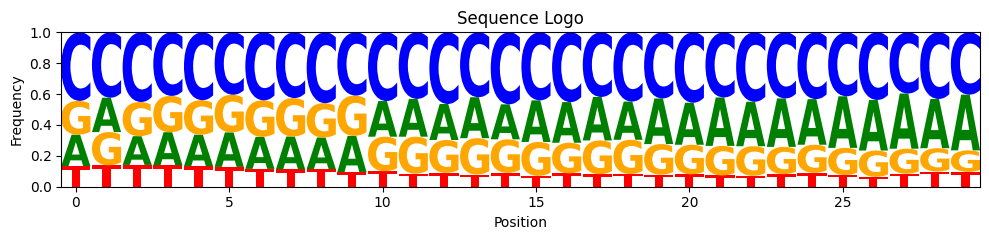

In [12]:
print('region_length=', region_length)
# region_length = 206586192 - 206586162  # Length of the region
create_sequence_logo(df_Jurkat, region_length)

#  Filter the DataFrame for reads on the + strand


In [20]:
#  Filter the DataFrame for reads on the + strand
plus_strand_df = df[df['strand'] == '+']

print(plus_strand_df)

                               query_name  \
0    ff1fc249-aa9b-4495-be8d-bed3d2ffa67a   
1    c7283b36-b903-4d07-985d-971a964fce62   
2    3bef509c-fd78-4342-b51f-c2c2dedd7498   
3    65fe0683-cc55-48ab-9b16-fcf33da52389   
4    6ea61913-551f-44b3-b9f5-3fcb7c8744ee   
..                                    ...   
259  02d255f8-b148-4db9-978d-110308c0b14f   
260  ee9fe4b8-8902-4015-924f-88eea83fed59   
261  74f3ab7f-2015-434e-a95a-2d6d7481420d   
262  ed6a02b5-a1eb-4abe-9202-6c1815747d21   
266  17a256aa-f620-4186-970c-c5f505ff34d4   

                                              sequence  \
0    CTTCGTTCAGTTACGTATTGCTTCCCTGGAATCAGCAGGACTGACC...   
1    TCCTGGAATCACTATTATCAGACGACCTGACCTTTGTTAGTATCTC...   
2    TCACTGGGCCTTTAGCCTTCCCGCTCAATTACCACACTCCCTTCTT...   
3    ATGCTTCGTTCAGTTACGTGGCTTCCTCACTGGGCCTTTTGCCTTC...   
4    CTTCGTTCAGTTACGTATTGCTCACTGGGCCTTTAGCCTTCCCGCT...   
..                                                 ...   
259  CACTGGGCCTTTAGCCTTCCCCGCTCCAATTACCACACTCCTTCTT..

<Figure size 1200x600 with 0 Axes>

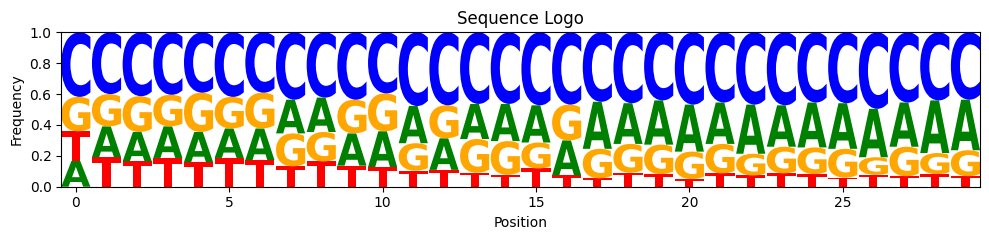

In [22]:
create_sequence_logo(plus_strand_df, region_length)

<Figure size 1200x600 with 0 Axes>

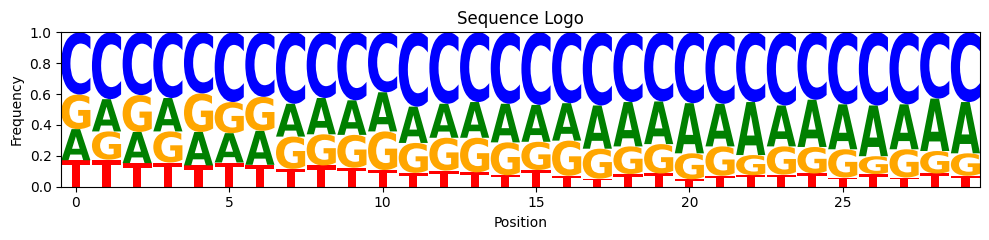

In [21]:
create_sequence_logo(df, region_length)

In [24]:
bam_Jurkat_file_path = "/home/michalula/data/cas9_nanopore/data/20231019_cas9_12ef_Jurkat/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.updated.bam"

# "/home/michalula/data/cas9_nanopore/data/2024927_Cas9_R9_promethion_K562/to_t2t_v1_1/sort_aligned_T2Tv1_1_trim_bam_pass_merged.bam"
# "example.bam"  # Replace with the path to your BAM file
region = "chr1:206586162-206586192"

df_Jurkat = extract_sequences(bam_Jurkat_file_path, region)
print(df_Jurkat)

np.unique(df_Jurkat.overlap_sequence, return_counts=True )

                               query_name  \
0    9343e1fe-dfbc-4434-b969-95a0ee2bd0f2   
1    b69854bc-ff64-4b07-bf2e-b05edf6385ba   
2    4a9708df-dfb6-4e6f-8795-a6f3e697e947   
3    51a762b4-5376-49f0-8d2d-32fe9a21236f   
4    98feb4c6-8f87-47ec-bebf-1734bfff7f1c   
..                                    ...   
930  5ab5be1c-33d0-4fa5-9fd4-80da4a83e332   
931  1f98a61a-e1db-47d0-be2c-8eaa4f652127   
932  03faf2c3-232a-41bd-8351-51345d42b6fc   
933  cbd05586-1c36-46fd-9fa6-5e73868e7374   
934  ce603029-b675-44e6-a6a9-12b0cac6b940   

                                              sequence quality      start  \
0    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
1    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
2    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
3    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
4    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052 

(array(['CCGCCCCGAGGCGCGCGCGCGCGCGCGCAC'], dtype=object), array([935]))

region_length= 30


<Figure size 1200x600 with 0 Axes>

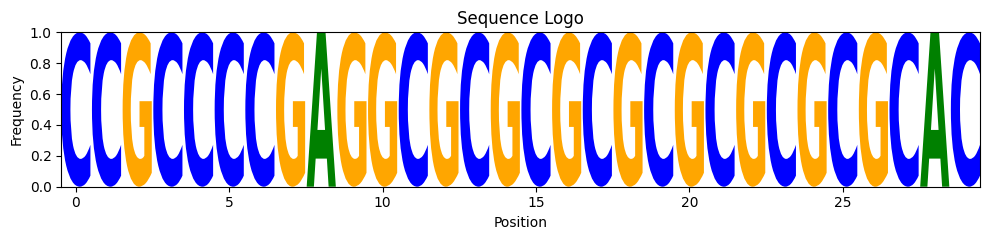

In [11]:
print('region_length=', region_length)
# region_length = 206586192 - 206586162  # Length of the region
create_sequence_logo(df_Jurkat, region_length)

                               query_name  \
0    9343e1fe-dfbc-4434-b969-95a0ee2bd0f2   
1    b69854bc-ff64-4b07-bf2e-b05edf6385ba   
2    4a9708df-dfb6-4e6f-8795-a6f3e697e947   
3    51a762b4-5376-49f0-8d2d-32fe9a21236f   
4    98feb4c6-8f87-47ec-bebf-1734bfff7f1c   
..                                    ...   
931  5ab5be1c-33d0-4fa5-9fd4-80da4a83e332   
932  1f98a61a-e1db-47d0-be2c-8eaa4f652127   
933  03faf2c3-232a-41bd-8351-51345d42b6fc   
934  cbd05586-1c36-46fd-9fa6-5e73868e7374   
935  ce603029-b675-44e6-a6a9-12b0cac6b940   

                                              sequence quality      start  \
0    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
1    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
2    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
3    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
4    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052 

<Figure size 1200x600 with 0 Axes>

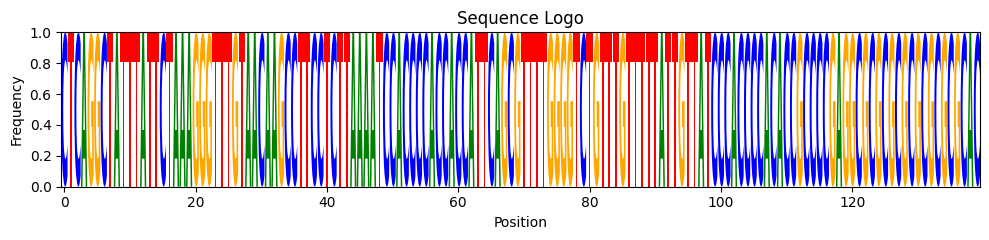

In [25]:
region = "chr1:206586052-206586192"
# "chr1:206585601-206588390" ~2700 bps

df_Jurkat = extract_sequences(bam_Jurkat_file_path, region)
print(df_Jurkat)
region_length = -(206586052-206586192) # 206586192 - 206586162  # Length of the region
print('region_length=', region_length)
create_sequence_logo(df_Jurkat, region_length)

In [26]:
np.unique(df_Jurkat.overlap_sequence, return_counts=True )

(array(['CTCAGGCTATTTATTCTAAAGGGTTTGTAACAAGCCTTCCTCTTAAAATCCACC',
        'CTCAGGCTATTTATTCTAAAGGGTTTGTAACAAGCCTTCCTCTTAAAATCCACCCCACCACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCAC'],
       dtype=object),
 array([  1, 935]))

In [28]:
len('CTCAGGCTATTTATTCTAAAGGGTTTGTAACAAGCCTTCCTCTTAAAATCCACCCCACCACCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCAC')

140

In [27]:
region_length

140

                               query_name  \
0    9343e1fe-dfbc-4434-b969-95a0ee2bd0f2   
1    b69854bc-ff64-4b07-bf2e-b05edf6385ba   
2    4a9708df-dfb6-4e6f-8795-a6f3e697e947   
3    51a762b4-5376-49f0-8d2d-32fe9a21236f   
4    98feb4c6-8f87-47ec-bebf-1734bfff7f1c   
..                                    ...   
953  cc1378bb-d55e-4fdb-8bd9-054d64bea7f8   
954  0861011f-f2e5-4409-b21f-faef070c1afe   
955  9039353a-b997-4583-a63b-a7c90582ab5c   
956  41efa716-7e5c-480f-ba57-be15089bb564   
957  024150be-186e-4d98-aeb5-31678de232f7   

                                              sequence quality      start  \
0    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
1    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
2    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
3    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052   
4    TTCCTGGAATCAACAGGACTGACCCCAAACCTTTGTTCGTATCTCA...    None  206583052 

<Figure size 1200x600 with 0 Axes>

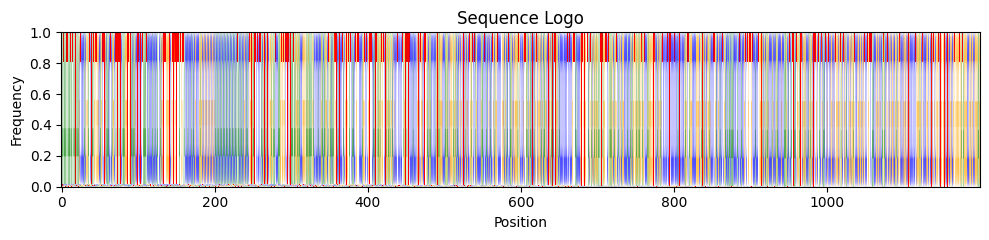

In [15]:
region = "chr1:206585989-206587189"
# "chr1:206585601-206588390" ~2700 bps

df_Jurkat = extract_sequences(bam_Jurkat_file_path, region)
print(df_Jurkat)
region_length = -(206585989-206587189) # 206586192 - 206586162  # Length of the region
print('region_length=', region_length)
create_sequence_logo(df_Jurkat, region_length)